<h1 style='color:#'>Predicting the Likelihood of E-Signing a Loan Based on Financial History</h1>

<h2 style='color:#2c71e8'>Importing Libraries</h2>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h2 style='color:#2c71e8'>Loading the dataset</h2>

In [2]:
dataset = pd.read_csv('P39-Financial-Data.csv')
# check the shape of dataset
dataset.shape

(17908, 21)

<h2 style='color:#2c71e8'>Exploratory Data Analysis</h2>

In [3]:
# check the first five rows of dataset
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
# print the columns of dataset
dataset.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [5]:
# check the description of dataset
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [6]:
# Cleaning the dataset

In [7]:
# check if any na value present in columns or not
dataset.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

### Histogram

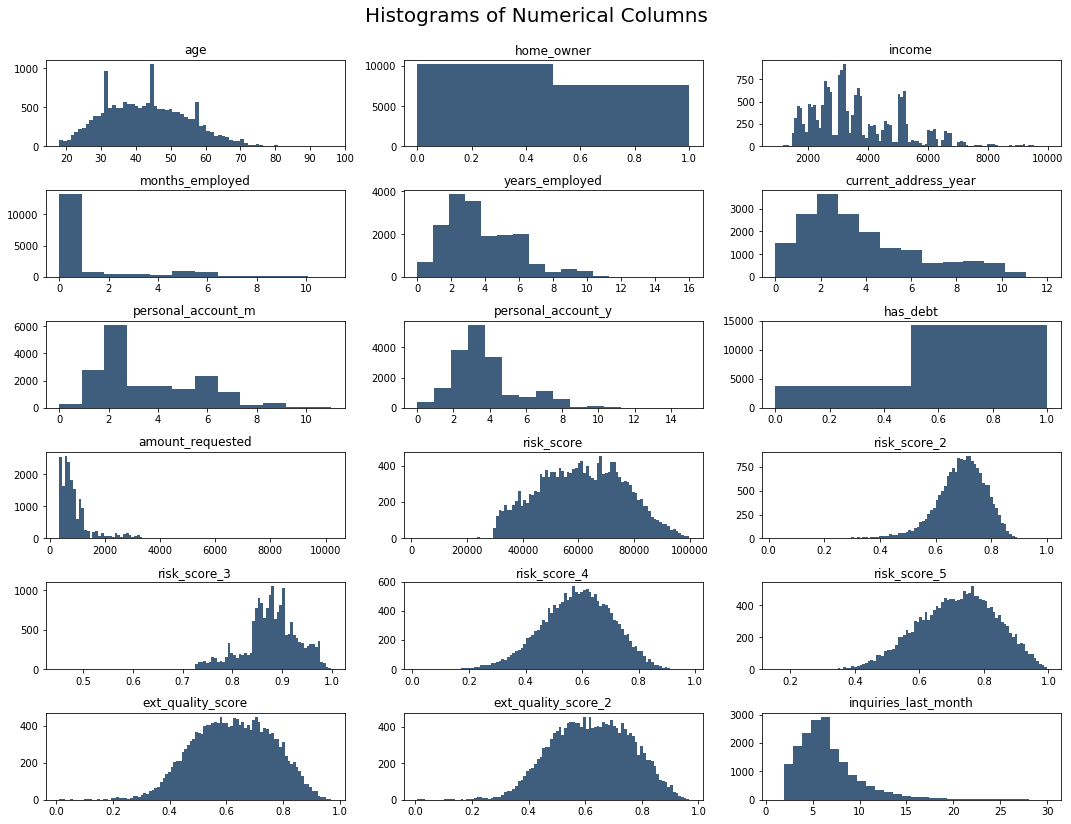

In [8]:
dataset2 = dataset.drop(columns=["entry_id","pay_schedule","e_signed"])

fig = plt.figure(figsize=(15,12))
plt.suptitle('Histograms of Numerical Columns',fontsize=20)
for i in range(dataset2.shape[1]):
    plt.subplot(6,3,i+1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])
    
    vals = np.size(dataset2.iloc[:,i].unique())
    if vals >=100:
        vals=100
    plt.hist(dataset2.iloc[:,i],bins=vals,color='#3F5D7D')
plt.tight_layout(rect=[0,0.03,1,0.95])

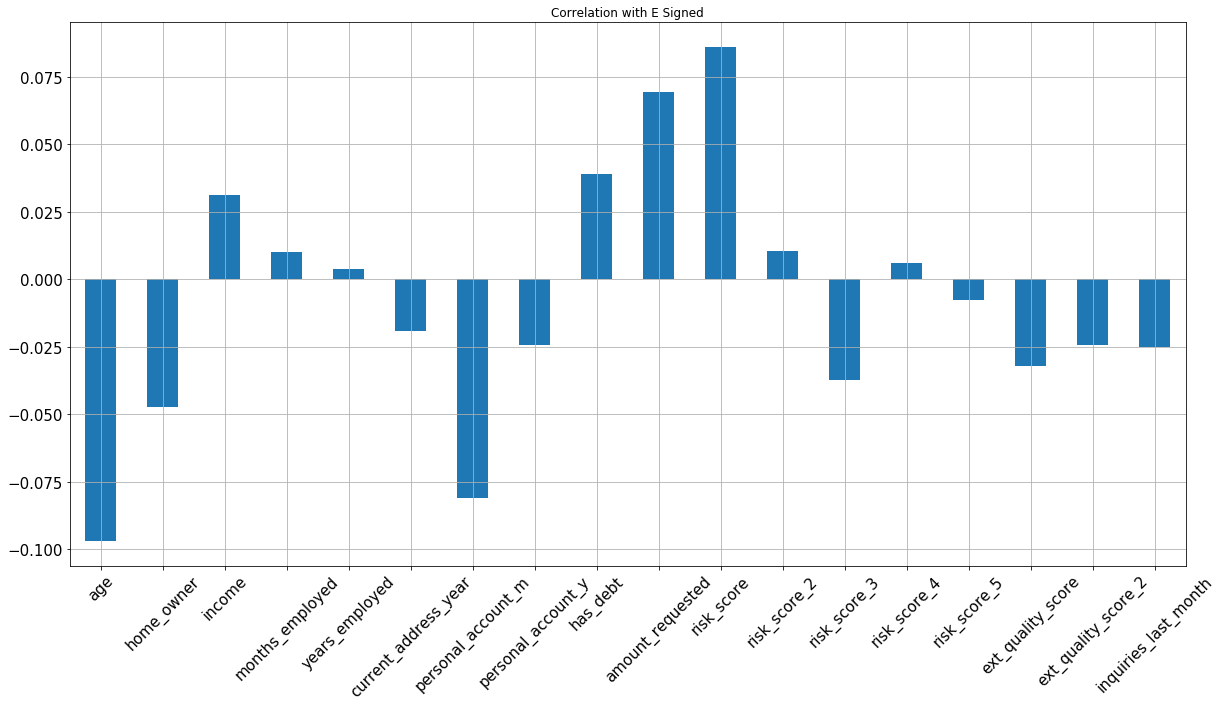

In [9]:
# correlation with response variable(e_signed)

dataset2.corrwith(dataset.e_signed).plot.bar(
                    figsize=(20,10),title="Correlation with E Signed",fontsize=15,
                    rot=45,grid=True
                    )
plt.show()

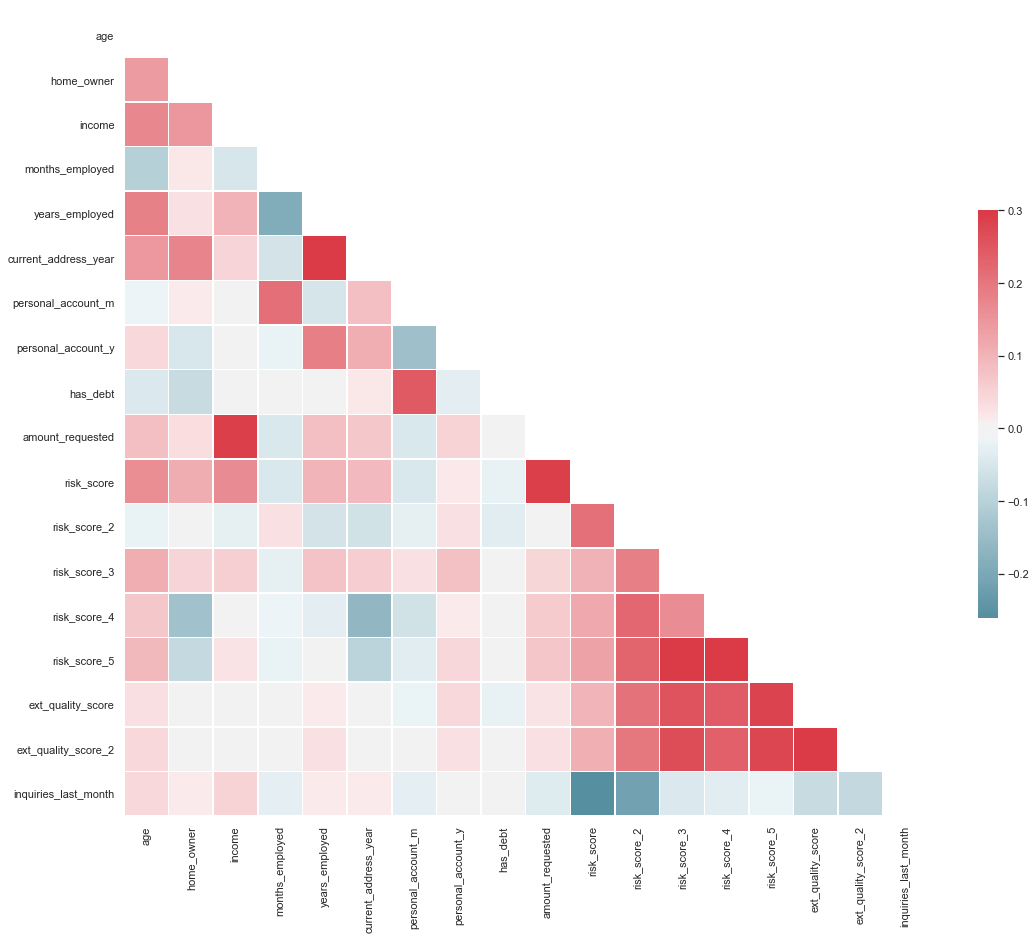

In [10]:
# plot Correlation Matrix

sns.set(style="white")

# compute the correlation matrix
corr = dataset2.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# setup the matplotlib figure
f,ax = plt.subplots(figsize=(18,15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink":.5})

plt.show()

<h2 style='color:#2c71e8'>Data Preprocessing</h2>

In [11]:
dataset = pd.read_csv('P39-Financial-Data.csv')

In [12]:
dataset['personal_account_months'] = (dataset.personal_account_m + (dataset.personal_account_y*12))

In [13]:
# check first five rows
dataset[['personal_account_m','personal_account_y','personal_account_months']].head()

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98


In [14]:
# drop personal_account_m  and personal_account_y columns from dataset
dataset = dataset.drop(columns=['personal_account_m','personal_account_y'])

In [15]:
# one hot encoding

dataset = pd.get_dummies(dataset)
print(dataset.columns)

Index(['entry_id', 'age', 'home_owner', 'income', 'months_employed',
       'years_employed', 'current_address_year', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed',
       'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')


In [16]:
# to avoid dummy variable trap we drop pay_schedule_semi-monthly
dataset = dataset.drop(columns=['pay_schedule_semi-monthly'])

In [17]:
# removing extra columns
response = dataset.e_signed
users = dataset.entry_id
dataset = dataset.drop(columns=['e_signed','entry_id'])

In [18]:
# splitting the dataset into Train and Test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset,
                                                 response,
                                                 test_size=0.2,
                                                 random_state=0
                                                )

In [19]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

In [20]:
# check X_train after scaling
X_train.head(3)

,age,home_owner,income,months_employed,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,personal_account_months,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_weekly
5957,-0.005991,-0.856349,-0.242358,2.010065,-1.567782,-0.573557,0.507058,-0.642580,-1.905162,-1.190501,-0.766112,0.979893,-0.229380,-1.060059,-1.057386,1.784494,0.368965,-1.224638,-0.302360,1.976827
16854,-0.509890,-0.856349,-0.052592,1.592692,0.206559,-0.937970,0.507058,-0.785621,-0.749184,1.254553,0.607772,-0.396208,0.823356,0.041801,-0.672086,-0.663369,-0.280906,-1.224638,3.307315,-0.505861
4429,-0.761840,1.167748,-0.412149,-0.494169,-1.124197,-0.937970,-1.972161,-0.642580,-1.437575,0.532590,-1.485619,-0.086860,-0.775633,0.588358,-0.841550,1.240525,0.195666,0.816568,-0.302360,-0.505861


In [21]:
# check X_test after scaling
X_test.head(3)

,age,home_owner,income,months_employed,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,personal_account_months,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_weekly
3629,-1.013789,-0.856349,-0.242358,-0.494169,-1.124197,-1.302383,0.507058,0.358706,-0.944012,0.548408,-1.076350,0.059153,0.326152,0.314517,-0.399633,0.696555,-0.324231,-1.224638,-0.30236,-0.505861
1820,-1.013789,-0.856349,-0.335577,-0.494169,-0.237027,-1.302383,-1.972161,-0.213457,0.767226,-0.024644,-0.047016,-0.029979,0.641494,-0.781613,-0.063715,-1.207338,0.195666,0.816568,-0.30236,-0.505861
6685,0.245958,-0.856349,-0.598586,-0.494169,2.868070,0.884094,0.507058,0.215665,0.757484,-1.051686,-0.521003,-1.033452,-1.293930,-0.505566,-0.503429,-0.391384,-0.844128,-1.224638,-0.30236,-0.505861


<h2 style='color:#2c71e8'>Model Building</h2>

#### Compare Different Models

In [22]:
# logistic regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0,penalty='l1',solver='liblinear')
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# predicting test set
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [24]:
# Evaluating the model

from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

acc = accuracy_score(y_test,y_pred)
print(f'Accuracy on test data is {acc:.2f}%')

Accuracy on test data is 0.56%


In [25]:
prec = precision_score(y_test,y_pred)
print(f'Precision score on test data is {prec:.2f}%')

Precision score on test data is 0.58%


In [26]:
rec = recall_score(y_test,y_pred)
print(f'Recall score on test data is {rec:.2f}%')

Recall score on test data is 0.71%


In [27]:
f1 = f1_score(y_test,y_pred)
print(f'f1 score on test data is {f1:.2f}%')

f1 score on test data is 0.63%


- Display all results together

In [28]:
results = pd.DataFrame([['Logistic Regression (Lasso)',acc,prec,rec,f1]],
                      columns=['Model','Accuracy','Precision','Recall','F1 Score']
                      )
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.562256,0.576271,0.705394,0.634328


In [29]:
# Support Vector Machine (linear)

from sklearn.svm import SVC
classifier = SVC(random_state=0,kernel='linear')
classifier.fit(X_train,y_train)

# predicting test set
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test,y_pred)   # calculate accuracy
prec = precision_score(y_test,y_pred) # calculate precision score
rec = recall_score(y_test,y_pred)     # calculate recall score
f1 = f1_score(y_test,y_pred)          # calculate f1 score

model_results = pd.DataFrame([['Support Vector Machine(Linear)',acc,prec,rec,f1]],
                      columns=['Model','Accuracy','Precision','Recall','F1 Score']
                      )

# append dataframe
results = results.append(model_results,ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.562256,0.576271,0.705394,0.634328
1,Support Vector Machine(Linear),0.568956,0.578240,0.735996,0.647649


In [30]:
# Support Vector Machine (rbf)

from sklearn.svm import SVC
classifier = SVC(random_state=0,kernel='rbf')
classifier.fit(X_train,y_train)

# predicting test set
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test,y_pred)   # calculate accuracy
prec = precision_score(y_test,y_pred) # calculate precision score
rec = recall_score(y_test,y_pred)     # calculate recall score
f1 = f1_score(y_test,y_pred)          # calculate f1 score

model_results = pd.DataFrame([['Support Vector Machine(RBF)',acc,prec,rec,f1]],
                      columns=['Model','Accuracy','Precision','Recall','F1 Score']
                      )

# append dataframe
results = results.append(model_results,ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.562256,0.576271,0.705394,0.634328
1,Support Vector Machine(Linear),0.568956,0.578240,0.735996,0.647649
2,Support Vector Machine(RBF),0.592686,0.605678,0.697095,0.648179


In [31]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0,n_estimators=100,criterion='entropy')
classifier.fit(X_train,y_train)

# predicting test set
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test,y_pred)   # calculate accuracy
prec = precision_score(y_test,y_pred) # calculate precision score
rec = recall_score(y_test,y_pred)     # calculate recall score
f1 = f1_score(y_test,y_pred)          # calculate f1 score

model_results = pd.DataFrame([['Random Forest(n_estimators=100)',acc,prec,rec,f1]],
                      columns=['Model','Accuracy','Precision','Recall','F1 Score']
                      )

# append dataframe
results = results.append(model_results,ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.562256,0.576271,0.705394,0.634328
1,Support Vector Machine(Linear),0.568956,0.578240,0.735996,0.647649
2,Support Vector Machine(RBF),0.592686,0.605678,0.697095,0.648179
3,Random Forest(n_estimators=100),0.638470,0.657698,0.684647,0.670902


In [32]:
# apply k-fold cross validation with random forest as estimator

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
accuracies

array([0.62386602, 0.62805304, 0.6140963 , 0.62875087, 0.62177251,
       0.60711793, 0.64664804, 0.61103352, 0.63547486, 0.62430168])

In [33]:
print(f'Random Forest Classifier Accuracy with k fold cross validation  is {accuracies.mean():.2f}%')

Random Forest Classifier Accuracy with k fold cross validation  is 0.62%


<h2 style='color:#2c71e8'>Applying Grid search</h2>

In [34]:
# Round 1: Entropy

parameters = {
    "max_depth":[3,None],
    "max_features":[1,5,10],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,5,10],
    "bootstrap":[True,False],
    "criterion":["entropy"]
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=classifier,
             param_grid=parameters,
             scoring="accuracy",
             cv=10,
             n_jobs=-1             
            )
# check time of running grid search
import time
t0 = time.time()
grid_search = grid_search.fit(X_train,y_train)
t1 = time.time()
print(f'GridSearchCV took {t1-t0:.2f}')

GridSearchCV took 1741.84


In [35]:
# check best accuracy and best parameters
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
print(f'Best accuracy find by grid search is {rf_best_accuracy}')

Best accuracy find by grid search is 0.6362579286335267


In [36]:
print(f'Best parameters find by grid search is {rf_best_parameters}')

Best parameters find by grid search is {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}


<h2 style='color:#2c71e8'>Predicting Test Set</h2>

In [37]:
y_pred = grid_search.predict(X_test)

acc = accuracy_score(y_test,y_pred)   # calculate accuracy
prec = precision_score(y_test,y_pred) # calculate precision score
rec = recall_score(y_test,y_pred)     # calculate recall score
f1 = f1_score(y_test,y_pred)          # calculate f1 score

model_results = pd.DataFrame([['Random Forest(n_estimators=100,GSx2 + Entropy)',acc,prec,rec,f1]],
                      columns=['Model','Accuracy','Precision','Recall','F1 Score']
                      )

# append dataframe
results = results.append(model_results,ignore_index=True)


In [38]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.562256,0.576271,0.705394,0.634328
1,Support Vector Machine(Linear),0.568956,0.578240,0.735996,0.647649
2,Support Vector Machine(RBF),0.592686,0.605678,0.697095,0.648179
3,Random Forest(n_estimators=100),0.638470,0.657698,0.684647,0.670902
4,"Random Forest(n_estimators=100,GSx2 + Entropy)",0.630932,0.643330,0.705394,0.672934


In [39]:
# Round 2: Entropy
 
parameters = {
    "max_depth":[None],
    "max_features":[3,5,7],
    "min_samples_split":[8,10,12],
    "min_samples_leaf":[1,2,3],
    "bootstrap":[True],
    "criterion":["entropy"]
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=classifier,
             param_grid=parameters,
             scoring="accuracy",
             cv=10,
             n_jobs=-1             
            )
# check time of running grid search
import time
t0 = time.time()
grid_search = grid_search.fit(X_train,y_train)
t1 = time.time()
print(f'GridSearchCV took {t1-t0:.2f}')

GridSearchCV took 555.75


In [40]:
# check best accuracy and best parameters
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
print(f'Best accuracy find by grid search is {rf_best_accuracy}')

Best accuracy find by grid search is 0.6361185562187387


In [41]:
print(f'Best parameters find by grid search is {rf_best_parameters}')

Best parameters find by grid search is {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 8}


In [42]:
# Round 1: Gini

parameters = {
    "max_depth":[3,None],
    "max_features":[1,5,10],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,5,10],
    "bootstrap":[True,False],
    "criterion":["gini"]
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=classifier,
             param_grid=parameters,
             scoring="accuracy",
             cv=10,
             n_jobs=-1             
            )
# check time of running grid search
import time
t0 = time.time()
grid_search = grid_search.fit(X_train,y_train)
t1 = time.time()
print(f'GridSearchCV took {t1-t0:.2f}')

GridSearchCV took 1132.88


In [43]:
# check best accuracy and best parameters
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
print(f'Best accuracy find by grid search is {rf_best_accuracy}')

Best accuracy find by grid search is 0.6378633916423333


In [44]:
print(f'Best parameters find by grid search is {rf_best_parameters}')

Best parameters find by grid search is {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [45]:
# Round 2: Gini

parameters = {
    "max_depth":[None],
    "max_features":[3,5,7],
    "min_samples_split":[8,10,12],
    "min_samples_leaf":[1,2,3],
    "bootstrap":[True],
    "criterion":["gini"]
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=classifier,
             param_grid=parameters,
             scoring="accuracy",
             cv=10,
             n_jobs=-1             
            )
# check time of running grid search
import time
t0 = time.time()
grid_search = grid_search.fit(X_train,y_train)
t1 = time.time()
print(f'GridSearchCV took {t1-t0:.2f}')

GridSearchCV took 375.89


In [46]:
# check best accuracy and best parameters
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
print(f'Best accuracy find by grid search is {rf_best_accuracy}')

Best accuracy find by grid search is 0.635838008319461


In [47]:
print(f'Best parameters find by grid search is {rf_best_parameters}')

Best parameters find by grid search is {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 8}


In [48]:
y_pred = grid_search.predict(X_test)

acc = accuracy_score(y_test,y_pred)   # calculate accuracy
prec = precision_score(y_test,y_pred) # calculate precision score
rec = recall_score(y_test,y_pred)     # calculate recall score
f1 = f1_score(y_test,y_pred)          # calculate f1 score

model_results = pd.DataFrame([['Random Forest(n_estimators=100,GSx2 + Gini)',acc,prec,rec,f1]],
                      columns=['Model','Accuracy','Precision','Recall','F1 Score']
                      )

# append dataframe
results = results.append(model_results,ignore_index=True)

In [49]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.562256,0.576271,0.705394,0.634328
1,Support Vector Machine(Linear),0.568956,0.578240,0.735996,0.647649
2,Support Vector Machine(RBF),0.592686,0.605678,0.697095,0.648179
3,Random Forest(n_estimators=100),0.638470,0.657698,0.684647,0.670902
4,"Random Forest(n_estimators=100,GSx2 + Entropy)",0.630932,0.643330,0.705394,0.672934
5,"Random Forest(n_estimators=100,GSx2 + Gini)",0.627582,0.644455,0.687241,0.665161
